# Transport properties in directed Quantum Walks on the line

In [1]:
from qwak.qwak import QWAK

In [5]:
import networkx as nx
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from math import sqrt, ceil, pow
import scipy.special as sp
from scipy.linalg import expm
import sympy as simp

## Bessel equation for the probability distribution

In [6]:
def inf_line_bessel_oriented10(k,nx,t,alpha,theta,gamma,l):
    domain = np.arange(0, nx) - nx//2
    prob = np.zeros([nx + 1,1], dtype='complex')
    for x in range(nx):
            prob[x,0] = ( (np.cos(theta)**2) * (sp.jv(domain[x] + k, 2*t)**2)
                        + (np.sin(theta)**2) * (sp.jv(domain[x] - k, 2*t)**2)
                        + 2*((-1)**k)*np.cos(2*alpha*k + gamma)*np.cos(theta)*np.sin(theta)*sp.jv(domain[x] + k, 2*t)*sp.jv(domain[x] - k, 2*t))

    return prob

In [12]:
k = 1
n0 = 100
if k > 0:
    theta=np.pi/4
else:
    theta = np.pi/2
l = 0
gamma = l * np.pi

alphaLen = range(2,4)
alphaList=[0] + [np.pi/(n) for n in alphaLen]
print(list(alphaList))
timeList = np.linspace(1,100,500)
timeListList = [timeList]*len(alphaList)
probListAux = []
probList = []

for alpha in alphaList:
    for t in timeList:
        psi_oriented = inf_line_bessel_oriented10(k,n0,t,alpha,theta,gamma,l)
        probListAux.append(np.sum(psi_oriented[n0//2-k-1:n0//2+k+2]))
    probList.append(probListAux)
    probListAux = []

[0, 1.5707963267948966, 1.0471975511965976]


## Decay rate plot

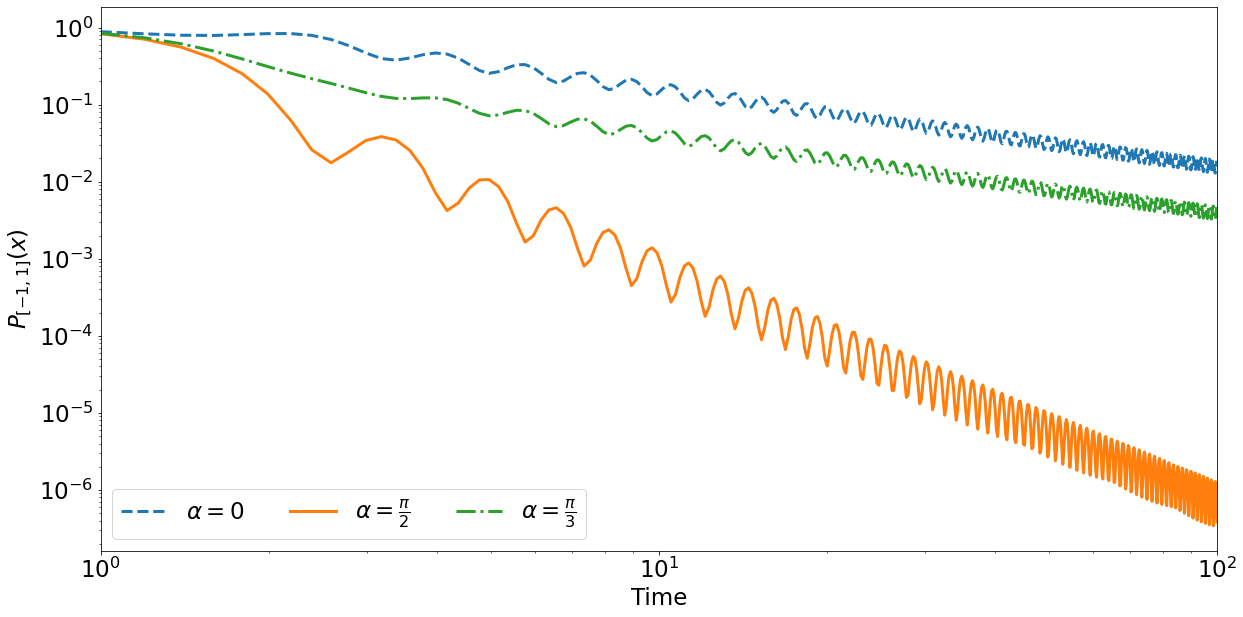

In [15]:
plt.loglog()
i=0
linewidth = 3
for probability,alpha in zip(probList,[0] + list(alphaLen)):
    if alpha == 0:
        plt.plot(timeList,probability,linestyle='--',linewidth=linewidth,label=r"$\alpha = 0$")
        i+=1
    else:
        if i==1:
            plt.plot(timeList,probability,linestyle='-',linewidth=linewidth,label=r"$\alpha = \frac{\pi}{%s}$"%str(alpha))
            i+=1
        else:
            plt.plot(timeList,probability,linestyle='-.',linewidth=linewidth,label=r"$\alpha = \frac{\pi}{%s}$"%str(alpha))
# plt.plot(cubeFuncList,label="cube")
# plt.plot(invFuncList,label="inverse")
plt.xlim([1,100])
# print(probList)

labelsize = 23
mpl.rcParams['figure.figsize'] = [15,0]
plt.legend(loc="lower left", ncol=len(alphaList),fontsize=labelsize)
plt.ylabel(r"$P_{[-%s,%s]}(x)$"%(k,k),fontsize=labelsize)
plt.xlabel("Time",fontsize=labelsize)
mpl.rc('xtick', labelsize=labelsize)
mpl.rc('ytick', labelsize=labelsize)
plt.show()